In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import lightgbm as lgb
%matplotlib inline
pd.options.display.max_columns = 999

/anaconda3/envs/ztdl/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train_data = pd.read_csv('zestimate/train_2016_v2.csv', parse_dates =["transactiondate"])
print(train_data.shape)
train_data.head(10)

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
5,11509835,-0.2705,2016-01-02
6,12286022,0.0440,2016-01-02
7,17177301,0.1638,2016-01-02
8,14739064,-0.0030,2016-01-02
9,14677559,0.0843,2016-01-03


In [3]:
parcel = pd.read_csv('zestimate/properties_2016.csv')
print(parcel.shape)
parcel.head(10)

/anaconda3/envs/ztdl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,NaN,2400.0,NaN,NaN,2400.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34171873.0,-118380906.0,2500.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAC4,6.037125e+07,12447.0,3101.0,46795.0,96446.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1943.0,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34131929.0,-118351474.0,NaN,NaN,NaN,NaN,NaN,NaN,010V,260.0,LAC2,6.037144e+07,12447.0,3101.0,274049.0,96049.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3611.0,NaN,NaN,3611.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34171345.0,-118314900.0,5333.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,BUC4YY,6.037311e+07,396054.0,3101.0,NaN,96434.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34218210.0,-118331311.0,145865.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,BUR1*,6.037310e+07,396054.0,3101.0,NaN,96436.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,3754.0,NaN,NaN,3754.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34289776.0,-118432085.0,7494.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,SFC2*,6.037320e+07,47547.0,3101.0,NaN,96366.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,1.0

In [4]:
print(parcel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

Text(0.5, 1.0, 'Percentage of Present Information by Feature')

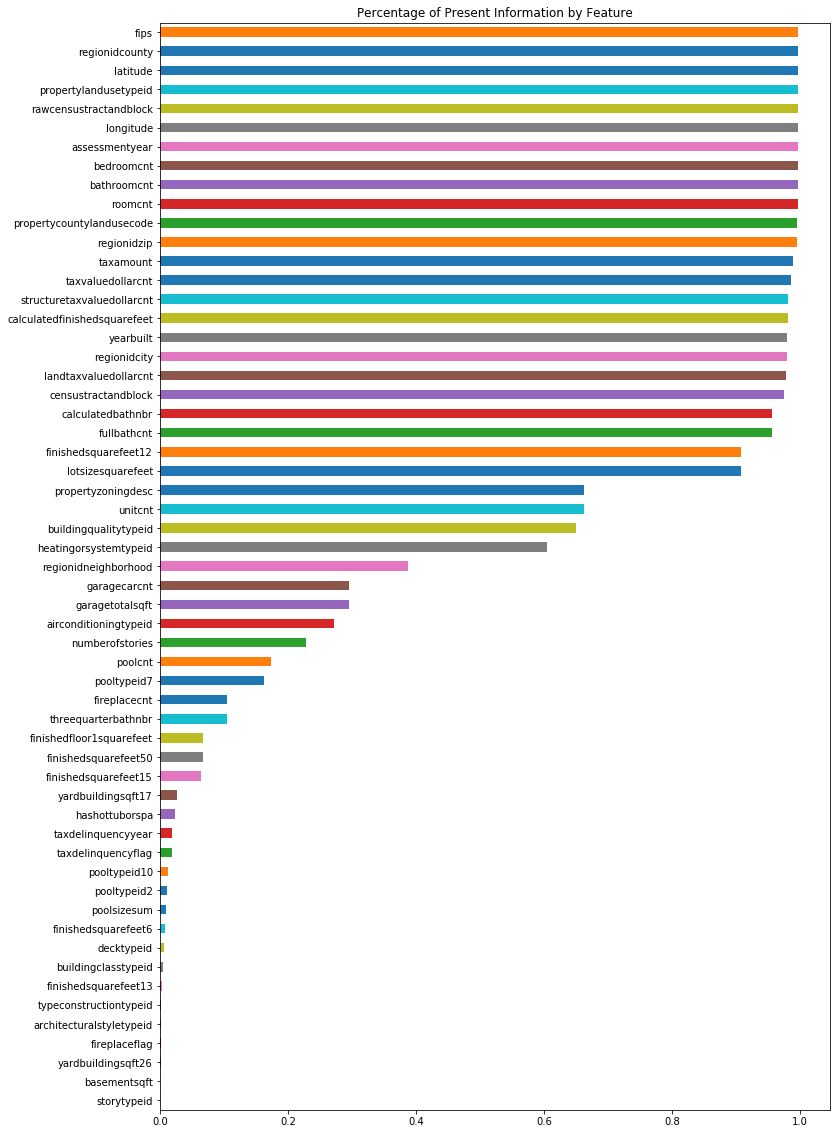

In [5]:
plt.figure(figsize=(12,20))
parcel.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = True).plot(kind = 'barh')
plt.title('Percentage of Present Information by Feature')

In [6]:
parcel.drop('parcelid',axis=1).notnull().mean().sort_values(ascending = False)

fips                            0.996169
regionidcounty                  0.996169
latitude                        0.996169
propertylandusetypeid           0.996169
rawcensustractandblock          0.996169
longitude                       0.996169
assessmentyear                  0.996168
bedroomcnt                      0.996164
bathroomcnt                     0.996160
roomcnt                         0.996156
propertycountylandusecode       0.995887
regionidzip                     0.995317
taxamount                       0.989532
taxvaluedollarcnt               0.985746
structuretaxvaluedollarcnt      0.981582
calculatedfinishedsquarefeet    0.981387
yearbuilt                       0.979925
regionidcity                    0.978948
landtaxvaluedollarcnt           0.977311
censustractandblock             0.974834
calculatedbathnbr               0.956817
fullbathcnt                     0.956817
finishedsquarefeet12            0.907533
lotsizesquarefeet               0.907511
propertyzoningde

Case 1:
These columns have NaN value that we replace them with 0. 
(e.g. ‘poolcnt’is number of pools in a lot NaN means there is no pool. 
So, I will replace all these values with 0.)

In [7]:
parcel.poolcnt.fillna(0,inplace = True)
parcel.pooltypeid2.fillna(0,inplace = True)
parcel.pooltypeid7.fillna(0,inplace = True)
parcel.garagecarcnt.fillna(0,inplace = True)
parcel.garagetotalsqft.fillna(0,inplace = True)
parcel.basementsqft.fillna(0,inplace = True)
parcel.yardbuildingsqft26.fillna(0,inplace = True)
parcel.yardbuildingsqft17.fillna(0,inplace = True)
parcel.airconditioningtypeid.fillna(5,inplace = True)
parcel.heatingorsystemtypeid.fillna(13,inplace = True)
parcel.unitcnt.fillna(1,inplace = True)
parcel.landtaxvaluedollarcnt.fillna(0,inplace = True)
parcel.structuretaxvaluedollarcnt.fillna(0,inplace = True)

Case 2: These columns have True value instead of numeric values and we replace their NaN that stands for False with 0 and True cells with 1: ‘hashottuborspa’

In [8]:
parcel.hashottuborspa.replace(to_replace = True, value = 1,inplace = True)
parcel.hashottuborspa.fillna(0,inplace = True)

parcel.taxdelinquencyflag.replace(to_replace = 'Y', value = 1,inplace = True)
parcel.taxdelinquencyflag.fillna(0,inplace = True)

# This column only has two values: 66 and NaN. I Convert 66 to 1
parcel.decktypeid.replace(to_replace = 66.0, value = 1,inplace = True)
parcel.decktypeid.fillna(0,inplace = True)

parcel.numberofstories.fillna(1,inplace = True)



Case 3:
 The value of these columns need to be determined by other columns 
(e.g. ‘poolsizesum’ is total square feet of pool in the property. 
We fill NaN values of this column based on Their ‘poolcnt’ column 
which is either 0 that we insert 0 for this column as well or 
they have at least one pool that we replace their pool size with median of other homes with pool.) or it combination of this case with case 2

In [9]:
parcel.loc[parcel.poolcnt==1, 'poolsizesum'] = parcel.loc[parcel.poolcnt==1, 'poolsizesum'].fillna(parcel[parcel.poolcnt==1].poolsizesum.median())
parcel.loc[parcel.poolcnt==0, 'poolsizesum']=0

# We will set "fireplacecnt" equal to the median value of 1 if "fireplaceflag" is "True" and "fireplacecnt" is NaN
parcel.loc[(parcel['fireplaceflag'] == True) & (parcel['fireplacecnt'].isnull()), ['fireplacecnt']] = 1
parcel.fireplacecnt.fillna(0,inplace = True)

# We will set "fireplaceflag" to "True" if "fireplacecnt" is 1 or larger "fireplaceflag" is NaN
parcel.loc[(parcel['fireplacecnt'] >= 1.0) & (parcel['fireplaceflag'].isnull()), ['fireplaceflag']] = True
parcel.fireplaceflag.fillna(0,inplace = True)
parcel.fireplaceflag.replace(to_replace = True, value = 1,inplace = True)

# Replace "calculatedfinishedsquarefeet"  NaN values with mean.
parcel['calculatedfinishedsquarefeet'].fillna((parcel['calculatedfinishedsquarefeet'].mean()), inplace=True)

# Replace "finishedsquarefeet15" NaN values with calculatedfinishedsquarefeet.
parcel.loc[parcel['finishedsquarefeet15'].isnull(),'finishedsquarefeet15'] = parcel['calculatedfinishedsquarefeet']

# Replace the NaN with the "calculatedfinishedsquarefeet" value. Fill in the rest with the average values.
parcel.loc[parcel['numberofstories'] == 1.0,'finishedsquarefeet50'] = parcel['calculatedfinishedsquarefeet']
parcel['finishedsquarefeet50'].fillna((parcel['finishedsquarefeet50'].mean()), inplace=True)

# Fill in NaN "calculatedbathnbr" with most common value
mode_bathroom = parcel['calculatedbathnbr'].value_counts().argmax()
parcel['calculatedbathnbr'] = parcel['calculatedbathnbr'].fillna(mode_bathroom)


# Fill in NaN "buildingqualitytypeid" with most common value
mode_building = parcel['buildingqualitytypeid'].value_counts().argmax()
parcel['buildingqualitytypeid'] = parcel['buildingqualitytypeid'].fillna(mode_building)

# Fill in NaN "propertyzoningdesc" with most common value
mode_propertyzoningdesc = parcel['propertyzoningdesc'].value_counts().argmax()
parcel['propertyzoningdesc'] = parcel['propertyzoningdesc'].fillna(mode_propertyzoningdesc)

# Fill in NaN "lotsizesquarefeet" with average 
parcel['lotsizesquarefeet'].fillna((parcel['lotsizesquarefeet'].mean()), inplace=True)

# Fill in NaN "taxvaluedollarcnt" with average 
parcel['taxvaluedollarcnt'].fillna((parcel['taxvaluedollarcnt'].mean()), inplace=True)

# Fill in NaN "yearbuilt" with most common value
mode_yearbuilt = parcel['yearbuilt'].value_counts().argmax()
parcel['yearbuilt'] = parcel['yearbuilt'].fillna(mode_yearbuilt)

# Fill in NaN "fips" with most common value
mode_fips = parcel['fips'].value_counts().argmax()
parcel['fips'] = parcel['fips'].fillna(mode_fips)

# Fill in NaN "propertylandusetypeid" with most common value
mode_propertylandusetypeid = parcel['propertylandusetypeid'].value_counts().argmax()
parcel['propertylandusetypeid'] = parcel['propertylandusetypeid'].fillna(mode_propertylandusetypeid)

# Fill in NaN "latitude" with most common value
mode_latitude = parcel['latitude'].value_counts().argmax()
parcel['latitude'] = parcel['latitude'].fillna(mode_latitude)

# Fill in NaN "longitude" with most common value
mode_longitude = parcel['longitude'].value_counts().argmax()
parcel['longitude'] = parcel['longitude'].fillna(mode_longitude)

# Fill in NaN "rawcensustractandblock" with most common value
mode_rawcensustractandblock = parcel['rawcensustractandblock'].value_counts().argmax()
parcel['rawcensustractandblock'] = parcel['rawcensustractandblock'].fillna(mode_rawcensustractandblock)

# Fill in NaN "assessmentyear" with most common value
mode_assessmentyear = parcel['assessmentyear'].value_counts().argmax()
parcel['assessmentyear'] = parcel['assessmentyear'].fillna(mode_assessmentyear)

# Fill in NaN "bedroomcnt" with most common value
mode_bedroomcnt = parcel['bedroomcnt'].value_counts().argmax()
parcel['bedroomcnt'] = parcel['bedroomcnt'].fillna(mode_bedroomcnt)

# Fill in NaN "bathroomcnt" with most common value
mode_bathroomcnt = parcel['bathroomcnt'].value_counts().argmax()
parcel['bathroomcnt'] = parcel['bathroomcnt'].fillna(mode_bathroomcnt)

# Fill in NaN "roomcnt" with most common value
mode_roomcnt = parcel['roomcnt'].value_counts().argmax()
parcel['roomcnt'] = parcel['roomcnt'].fillna(mode_roomcnt)

# Fill in NaN "propertycountylandusecode" with most common value
mode_propertycountylandusecode = parcel['propertycountylandusecode'].value_counts().argmax()
parcel['propertycountylandusecode'] = parcel['propertycountylandusecode'].fillna(mode_propertycountylandusecode)

# Fill in NaN "regionidzip " with most common value
mode_regionidzip = parcel['regionidzip'].value_counts().argmax()
parcel['regionidzip'] = parcel['regionidzip'].fillna(mode_regionidzip)



/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 'argmax' is deprecated, use 

Case 4: In this case, we have columns that have repeated information and we can simply drop them due to redundancy avoidance (e.g. ‘pooltypeid10’ tells us exact information same as ‘hashottuborspa’) or their data cannot help on improving the model like years

In [10]:
parcel.drop('pooltypeid10', axis=1, inplace=True)
parcel.drop('taxdelinquencyyear', axis=1, inplace=True)
parcel.drop('storytypeid', axis=1, inplace=True)
parcel.drop('architecturalstyletypeid', axis=1, inplace=True)
parcel.drop('typeconstructiontypeid', axis=1, inplace=True)
parcel.drop('finishedsquarefeet13', axis=1, inplace=True)
parcel.drop('buildingclasstypeid', axis=1, inplace=True)
parcel.drop('finishedsquarefeet6', axis=1, inplace=True)
parcel.drop('finishedsquarefeet12', axis=1, inplace=True)
parcel.drop('finishedfloor1squarefeet', axis=1, inplace=True)
parcel.drop('threequarterbathnbr', axis=1, inplace=True)
parcel.drop('fullbathcnt', axis=1, inplace=True)
parcel.drop('regionidneighborhood', axis=1, inplace=True)
parcel.drop('censustractandblock', axis=1, inplace=True)
parcel.drop('regionidcity', axis=1, inplace=True)
parcel.drop('regionidcounty', axis=1, inplace=True)

In [11]:
#Rare Case: To replace taxamount with means, we need to define new column by dividing
#"taxamount" by "taxvaluedollarcnt" and replacing the NaN values with the average
parcel['taxpercentage'] = parcel['taxamount'] / parcel['taxvaluedollarcnt']
parcel['taxpercentage'].fillna((parcel['taxpercentage'].mean()), inplace=True)
parcel.drop('taxamount', axis=1, inplace=True)

In [12]:
print(parcel.shape)
parcel.notnull().mean().sort_values(ascending = False)

(2985217, 42)


taxpercentage                   1.0
finishedsquarefeet50            1.0
longitude                       1.0
latitude                        1.0
heatingorsystemtypeid           1.0
hashottuborspa                  1.0
garagetotalsqft                 1.0
garagecarcnt                    1.0
fireplacecnt                    1.0
fips                            1.0
finishedsquarefeet15            1.0
taxdelinquencyflag              1.0
calculatedfinishedsquarefeet    1.0
decktypeid                      1.0
calculatedbathnbr               1.0
buildingqualitytypeid           1.0
bedroomcnt                      1.0
bathroomcnt                     1.0
basementsqft                    1.0
airconditioningtypeid           1.0
lotsizesquarefeet               1.0
poolcnt                         1.0
poolsizesum                     1.0
pooltypeid2                     1.0
landtaxvaluedollarcnt           1.0
assessmentyear                  1.0
taxvaluedollarcnt               1.0
structuretaxvaluedollarcnt  

In [13]:
train_with_months = train_data
train_with_months['sale_month'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
train_with_months['sale_day'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
train_with_months['sale_year'] = train_with_months['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)
train_with_months.head(10)

,parcelid,logerror,transactiondate,sale_month,sale_day,sale_year
0,11016594,0.0276,2016-01-01,1,1,2016
1,14366692,-0.1684,2016-01-01,1,1,2016
2,12098116,-0.0040,2016-01-01,1,1,2016
3,12643413,0.0218,2016-01-02,1,2,2016
4,14432541,-0.0050,2016-01-02,1,2,2016
5,11509835,-0.2705,2016-01-02,1,2,2016
6,12286022,0.0440,2016-01-02,1,2,2016
7,17177301,0.1638,2016-01-02,1,2,2016
8,14739064,-0.0030,2016-01-02,1,2,2016
9,14677559,0.0843,2016-01-03,1,3,2016


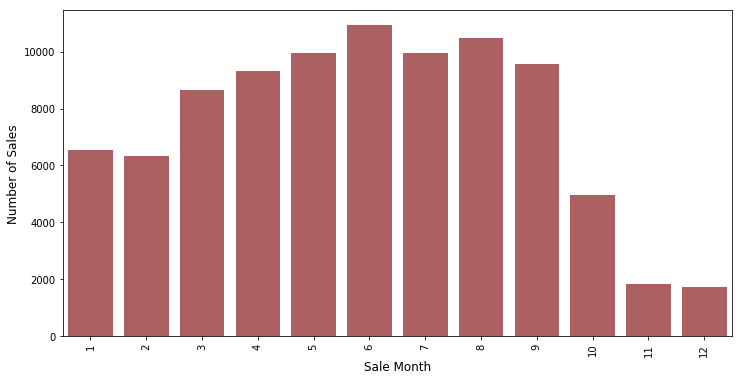

In [14]:
num_of_sales = train_with_months['sale_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(num_of_sales.index, num_of_sales.values, alpha=0.8, color='brown')
plt.xticks(rotation='vertical')
plt.xlabel('Sale Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.show()

Text(0, 0.5, 'Log Error Avg')

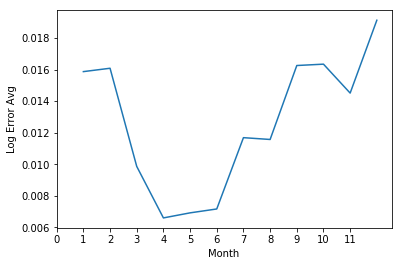

In [15]:
avg_logs_table = []
for x in range(1,13):
    avg_logs = np.mean(train_with_months[train_with_months['sale_month'] == x]['logerror'])
    avg_logs_table.append(avg_logs)

t = range(1,13)
plt.plot(t,avg_logs_table)
plt.xticks(np.linspace(0,11,12,endpoint=True))
plt.xlabel('Month')
plt.ylabel('Log Error Avg')

/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Average Absolute Log Error')

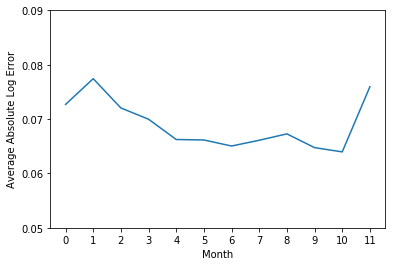

In [16]:
abs_log_error_list = train_with_months[['logerror','sale_month']]
abs_log_error_list['logerror'] = np.abs(abs_log_error_list['logerror'])

avg_abs_logs_table = []
for i in range(1,13):
    avg_logs = np.mean(abs_log_error_list[abs_log_error_list['sale_month'] == i]['logerror'])
    avg_abs_logs_table.append(avg_logs)

plt.plot(avg_abs_logs_table)
plt.xticks(np.linspace(0,11,12,endpoint=True))
plt.yticks(np.linspace(0.05,0.09,5,endpoint=True))
plt.xlabel('Month')
plt.ylabel('Average Absolute Log Error')

In [17]:
train_data.drop(['sale_month','sale_year','sale_day'],axis=1,inplace=True)
merged_data = train_data.merge(parcel,on='parcelid',how='left')
print(merged_data.shape)
merged_data.head(10)

(90275, 44)


,parcelid,logerror,transactiondate,airconditioningtypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet15,finishedsquarefeet50,fips,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidzip,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxdelinquencyflag,taxpercentage
0,11016594,0.0276,2016-01-01,1.0,0.0,2.0,3.0,4.0,2.0,0.0,1684.0,1684.0,1684.000000,6037.0,0.0,0.0,0.0,0.0,2.0,34280990.0,-118488536.0,7528.000000,0.0,0.0,0.0,0.0,0100,261.0,LARS,6.037107e+07,96370.0,0.0,1.0,0.0,0.0,1959.0,1.0,0,122754.0,360170.0,2015.0,237416.0,0.0,0.018702
1,14366692,-0.1684,2016-01-01,5.0,0.0,3.5,4.0,7.0,3.5,0.0,2263.0,2263.0,2263.000000,6059.0,0.0,2.0,468.0,0.0,13.0,33668120.0,-117677556.0,3643.000000,0.0,0.0,0.0,0.0,1,261.0,LAR1,6.059052e+07,96962.0,0.0,1.0,0.0,0.0,2014.0,1.0,0,346458.0,585529.0,2015.0,239071.0,0.0,0.017340
2,12098116,-0.0040,2016-01-01,1.0,0.0,3.0,2.0,4.0,3.0,0.0,2217.0,2217.0,2217.000000,6037.0,0.0,0.0,0.0,0.0,2.0,34136312.0,-118175032.0,11423.000000,0.0,0.0,0.0,0.0,0100,261.0,PSR6,6.037464e+07,96293.0,0.0,1.0,0.0,0.0,1940.0,1.0,0,61994.0,119906.0,2015.0,57912.0,0.0,0.095779
3,12643413,0.0218,2016-01-02,1.0,0.0,2.0,2.0,4.0,2.0,0.0,839.0,839.0,839.000000,6037.0,0.0,0.0,0.0,0.0,2.0,33755800.0,-118309000.0,70859.000000,0.0,0.0,0.0,0.0,010C,266.0,LAR3,6.037296e+07,96222.0,0.0,1.0,0.0,0.0,1987.0,1.0,0,171518.0,244880.0,2015.0,73362.0,0.0,0.012450
4,14432541,-0.0050,2016-01-02,5.0,0.0,2.5,4.0,7.0,2.5,0.0,2283.0,2283.0,1767.299285,6059.0,0.0,2.0,598.0,0.0,13.0,33485643.0,-117700234.0,6000.000000,1.0,495.0,0.0,1.0,122,261.0,LAR1,6.059042e+07,96961.0,8.0,1.0,0.0,0.0,1981.0,2.0,0,169574.0,434551.0,2015.0,264977.0,0.0,0.012631
5,11509835,-0.2705,2016-01-02,1.0,0.0,4.0,4.0,1.0,4.0,0.0,3067.0,3067.0,3067.000000,6037.0,0.0,0.0,0.0,0.0,2.0,33870089.0,-118402768.0,2708.000000,0.0,0.0,0.0,0.0,0100,261.0,HBR3YY,6.037621e+07,96109.0,0.0,1.0,0.0,0.0,1982.0,1.0,0,880650.0,2447951.0,2015.0,1567301.0,0.0,0.011081
6,12286022,0.0440,2016-01-02,5.0,0.0,1.0,2.0,7.0,1.0,0.0,1297.0,1297.0,1297.000000,6037.0,0.0,0.0,0.0,0.0,7.0,33899475.0,-118212720.0,6677.000000,0.0,0.0,0.0,0.0,0100,261.0,CORH*,6.037542e+07,96091.0,0.0,1.0,0.0,0.0,1939.0,1.0,0,64549.0,111521.0,2015.0,46972.0,0.0,0.020668
7,17177301,0.1638,2016-01-02,5.0,0.0,2.5,3.0,7.0,2.5,0.0,1763.0,1763.0,853.000000,6111.0,1.0,2.0,0.0,0.0,13.0,34207204.0,-119165589.0,22822.805528,0.0,0.0,0.0,0.0,1129,266.0,LAR1,6.111003e+07,97101.0,6.0,1.0,0.0,0.0,1994.0,2.0,1,107000.0,306000.0,2015.0,199000.0,0.0,0.012240
8,14739064,-0.0030,2016-01-02,5.0,0.0,1.0,2.0,7.0,1.0,0.0,796.0,796.0,796.000000,6059.0,0.0,1.0,0.0,0.0,13.0,33549600.0,-117678000.0,22822.805528,0.0,0.0,0.0,0.0,34,266.0,LAR1,6.059042e+07,96987.0,0.0,1.0,0.0,0.0,1984.0,1.0,0,66834.0,210064.0,2015.0,143230.0,0.0,0.010344
9,14677559,0.0843,2016-01-03,5.0,0.0,2.0,2.0,7.0,2.0,0.0,1260.0,1260.0,1260.000000,6059.0,0.0,1.0,0.0,0.0,13.0,33612700.0,-117742000.0,22822.805528,0.0,0.0,0.0,0.0,34,266.0,LAR1,6.059063e+07,96963.0,5.0,1.0,0.0,0.0,1977.0,1.0,0,109977.0,190960.0,2015.0,80983.0,0.0,0.010161


/anaconda3/envs/ztdl/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x864 with 0 Axes>

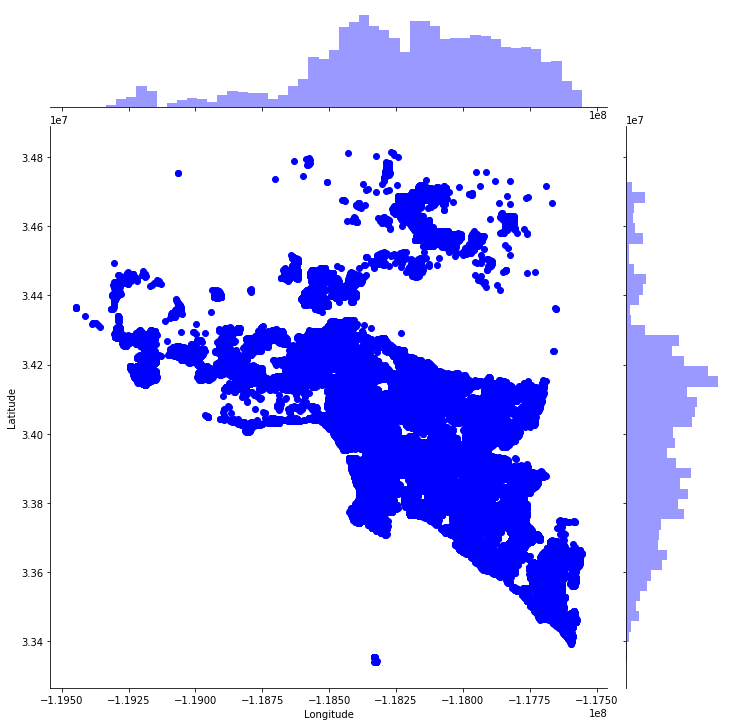

In [18]:
plt.figure(figsize=(12,12))
fig=sns.jointplot(x=merged_data.longitude.values, y=merged_data.latitude.values, size=10,color='b')
fig.set_axis_labels('Longitude','Latitude')
plt.show()

/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


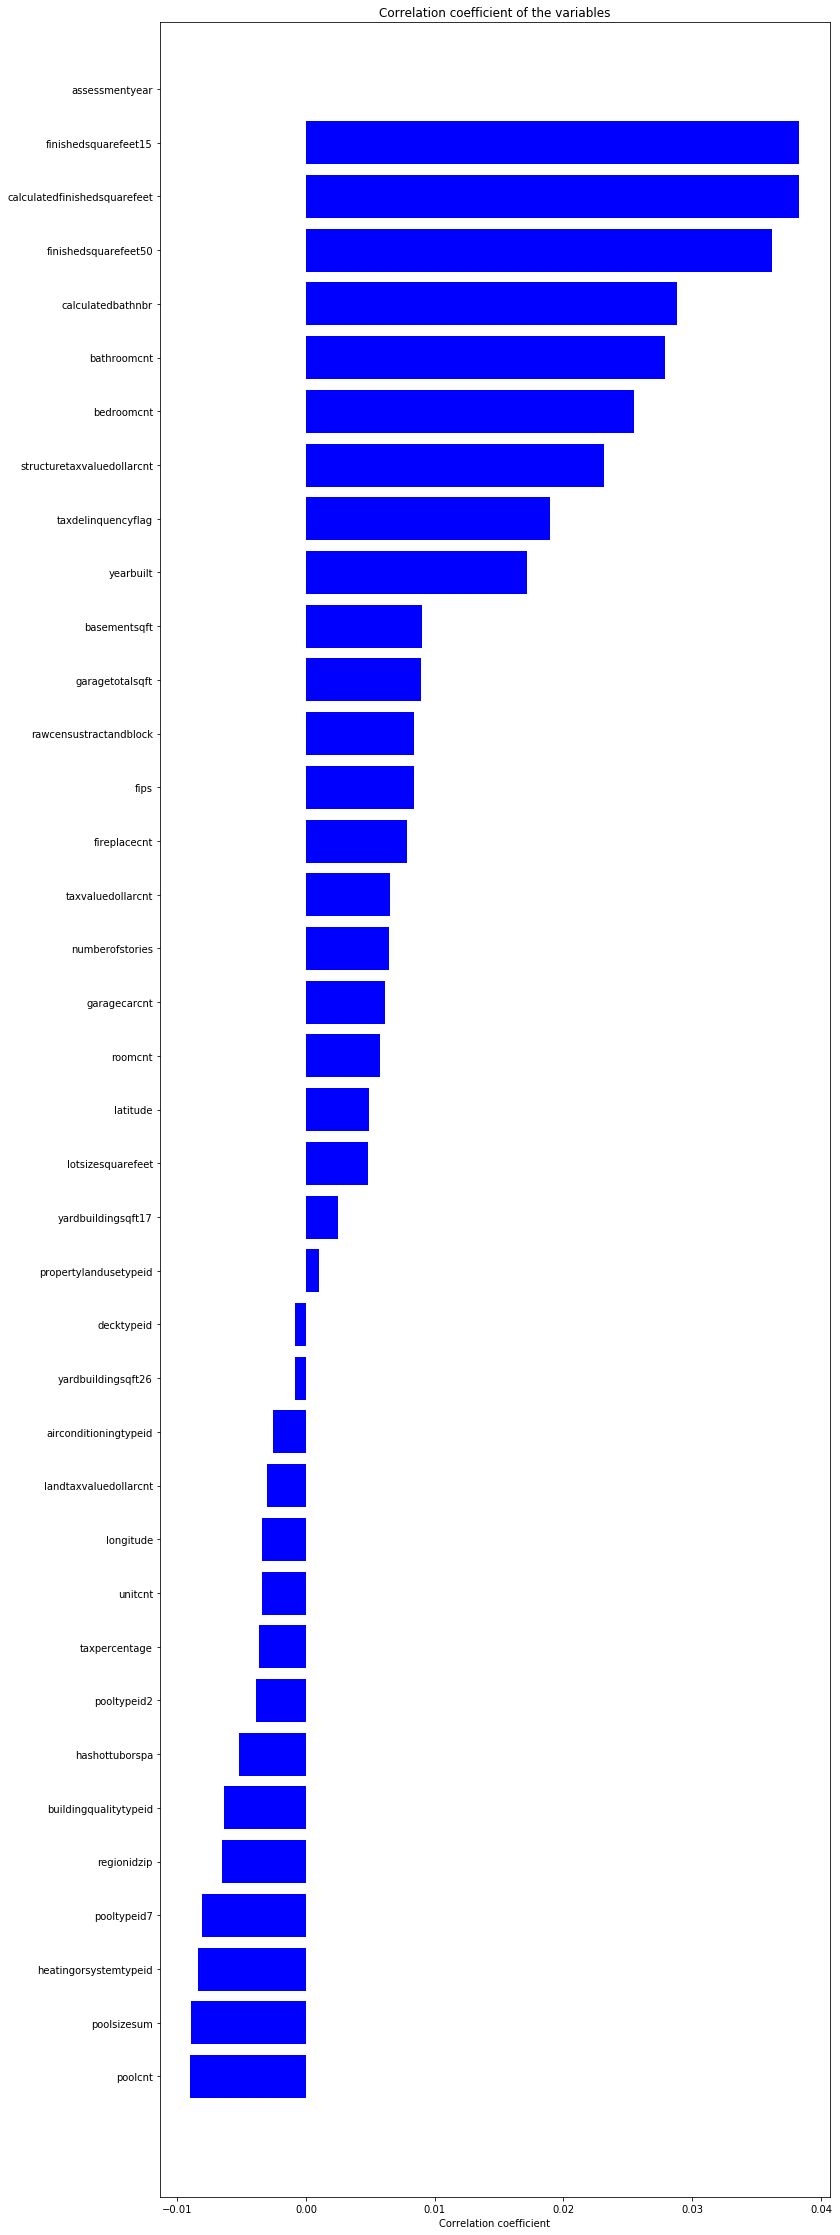

In [19]:
x_cols = [col for col in merged_data.columns if col not in ['logerror'] if merged_data[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(merged_data[col].values, merged_data.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [20]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

/anaconda3/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,col_labels,corr_values
32,structuretaxvaluedollarcnt,0.023141
3,bedroomcnt,0.025467
2,bathroomcnt,0.027889
5,calculatedbathnbr,0.028788
9,finishedsquarefeet50,0.036174
7,calculatedfinishedsquarefeet,0.038305
8,finishedsquarefeet15,0.038305


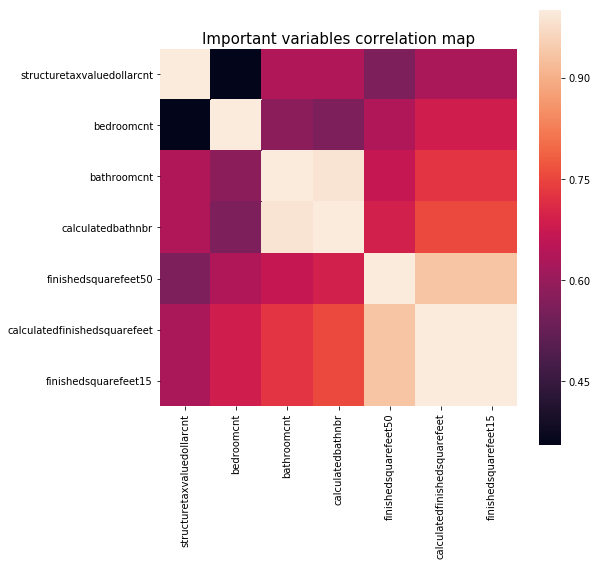

In [21]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = merged_data[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

# Machine Learning 

In [22]:
import gc

In [23]:
for c, dtype in zip(merged_data.columns, merged_data.dtypes):
    if dtype == np.float64 or dtype == np.int64:
        merged_data[c] = merged_data[c].astype(np.float32)

In [24]:
x_train = merged_data.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
y_train = merged_data['logerror'].values
print(x_train.shape, y_train.shape)

(90275, 39) (90275,)


In [25]:
split = 81000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(81000, 39)
(81000,)
(9275, 39)
(9275,)


In [26]:
train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)
    
d_train = lgb.Dataset(x_train, label=y_train)
d_valid = lgb.Dataset(x_valid, label=y_valid)

params = {}
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt' #gradient boosting
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5
params['num_leaves'] = 60
params['min_data'] = 500
params['min_hessian'] = 1 #avoid overfitting

In [27]:
watchlist = [d_valid]
clf = lgb.train(params, d_train, 500, watchlist)
y_pred=clf.predict(x_valid)
from sklearn.metrics import mean_absolute_error as mae
print("The mean absolute Error on the test set is:\t{:f}".format(mae(y_pred,y_valid)))

del d_train, d_valid; gc.collect()
del x_train, x_valid; gc.collect()

print("Prepare for the prediction ...")
sample = pd.read_csv('zestimate/sample_submission.csv')
sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(parcel, on='parcelid', how='left')
del sample; gc.collect()
x_test = df_test[train_columns]
del df_test; gc.collect()
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
x_test = x_test.values.astype(np.float32, copy=False)

print("Start prediction ...")
# num_threads > 1 will predict very slow in kernal
clf.reset_parameter({"num_threads":1})
p_test = clf.predict(x_test)

del x_test; gc.collect()

print("Start write result ...")
sub = pd.read_csv('zestimate/sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = p_test

sub.to_csv('lgb_results.csv', index=False, float_format='%.4f')

[1]	valid_0's l1: 0.0658093
[2]	valid_0's l1: 0.0658066
[3]	valid_0's l1: 0.0658048
[4]	valid_0's l1: 0.0658025
[5]	valid_0's l1: 0.0658002
[6]	valid_0's l1: 0.0657976
[7]	valid_0's l1: 0.0657952
[8]	valid_0's l1: 0.0657921
[9]	valid_0's l1: 0.0657894
[10]	valid_0's l1: 0.0657873
[11]	valid_0's l1: 0.0657845
[12]	valid_0's l1: 0.065782
[13]	valid_0's l1: 0.0657795
[14]	valid_0's l1: 0.0657768
[15]	valid_0's l1: 0.0657746
[16]	valid_0's l1: 0.0657719
[17]	valid_0's l1: 0.0657697
[18]	valid_0's l1: 0.0657669
[19]	valid_0's l1: 0.0657639
[20]	valid_0's l1: 0.0657622
[21]	valid_0's l1: 0.0657593
[22]	valid_0's l1: 0.0657571
[23]	valid_0's l1: 0.0657549
[24]	valid_0's l1: 0.0657527
[25]	valid_0's l1: 0.0657505
[26]	valid_0's l1: 0.0657479
[27]	valid_0's l1: 0.0657453
[28]	valid_0's l1: 0.0657436
[29]	valid_0's l1: 0.0657408
[30]	valid_0's l1: 0.0657388
[31]	valid_0's l1: 0.0657363
[32]	valid_0's l1: 0.0657346
[33]	valid_0's l1: 0.0657327
[34]	valid_0's l1: 0.0657309
[35]	valid_0's l1: 0.065

[284]	valid_0's l1: 0.0653866
[285]	valid_0's l1: 0.065386
[286]	valid_0's l1: 0.0653852
[287]	valid_0's l1: 0.0653851
[288]	valid_0's l1: 0.0653845
[289]	valid_0's l1: 0.065384
[290]	valid_0's l1: 0.0653834
[291]	valid_0's l1: 0.0653825
[292]	valid_0's l1: 0.065382
[293]	valid_0's l1: 0.0653812
[294]	valid_0's l1: 0.0653806
[295]	valid_0's l1: 0.0653801
[296]	valid_0's l1: 0.0653798
[297]	valid_0's l1: 0.0653796
[298]	valid_0's l1: 0.0653789
[299]	valid_0's l1: 0.0653783
[300]	valid_0's l1: 0.0653774
[301]	valid_0's l1: 0.0653767
[302]	valid_0's l1: 0.065376
[303]	valid_0's l1: 0.0653755
[304]	valid_0's l1: 0.0653746
[305]	valid_0's l1: 0.0653741
[306]	valid_0's l1: 0.0653739
[307]	valid_0's l1: 0.0653732
[308]	valid_0's l1: 0.0653727
[309]	valid_0's l1: 0.0653721
[310]	valid_0's l1: 0.0653714
[311]	valid_0's l1: 0.0653702
[312]	valid_0's l1: 0.0653695
[313]	valid_0's l1: 0.0653687
[314]	valid_0's l1: 0.0653683
[315]	valid_0's l1: 0.065368
[316]	valid_0's l1: 0.0653676
[317]	valid_0's